## K-means and K-means++ Clustering Exploration

#### dataset available here: https://github.com/mubaris/friendly-fortnight

In [17]:
# import packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

df=pd.read_csv('xclara.csv')
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [18]:
print(df.shape)

(3000, 2)


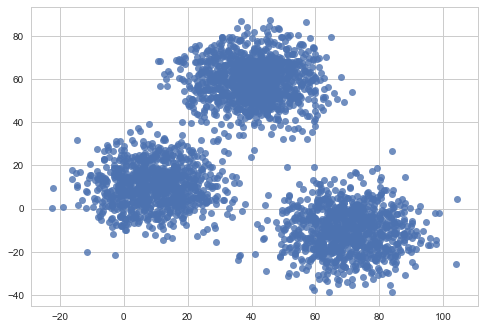

In [19]:
# scatter plot to show clusters
f1 = df['V1'].values
f2 = df['V2'].values
X = np.array(list(zip(f1, f2)))
sns.regplot(f1, f2,fit_reg=False)

#### Looks like there are 3 major clusters in the plot above.

### 1. K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
c1=KMeans(n_clusters=3,init='random',random_state=0)
y_c1 = c1.fit_predict(X)

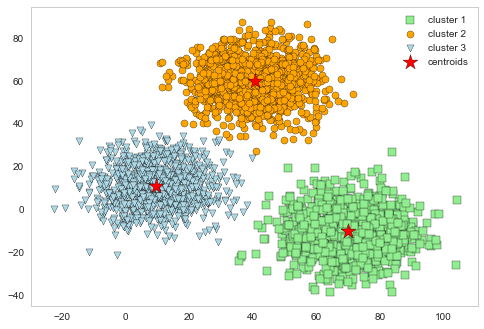

In [24]:
# plot clustering results
plt.scatter(X[y_c1 == 0, 0],
             X[y_c1 == 0, 1],
             s=50, c='lightgreen',
             marker='s', edgecolor='black',
             label='cluster 1')
plt.scatter(X[y_c1 == 1, 0],
             X[y_c1 == 1, 1],
             s=50, c='orange',
             marker='o', edgecolor='black',
             label='cluster 2')
plt.scatter(X[y_c1 == 2, 0],
             X[y_c1 == 2, 1],
             s=50, c='lightblue',
             marker='v', edgecolor='black',
             label='cluster 3')
plt.scatter(c1.cluster_centers_[:, 0],
             c1.cluster_centers_[:, 1],
             s=250, marker='*',
             c='red', edgecolor='black',
             label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


### 2. K-Means++ Clustering

In [25]:
c2=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_c2 = c2.fit_predict(X)

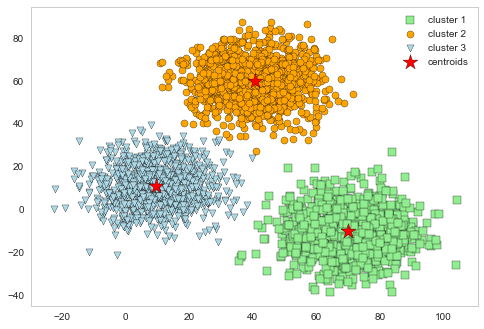

In [26]:
# plot clustering results
plt.scatter(X[y_c2 == 0, 0],
             X[y_c2 == 0, 1],
             s=50, c='lightgreen',
             marker='s', edgecolor='black',
             label='cluster 1')
plt.scatter(X[y_c2 == 1, 0],
             X[y_c2 == 1, 1],
             s=50, c='orange',
             marker='o', edgecolor='black',
             label='cluster 2')
plt.scatter(X[y_c2 == 2, 0],
             X[y_c2 == 2, 1],
             s=50, c='lightblue',
             marker='v', edgecolor='black',
             label='cluster 3')
plt.scatter(c2.cluster_centers_[:, 0],
             c2.cluster_centers_[:, 1],
             s=250, marker='*',
             c='red', edgecolor='black',
             label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### 3. Elbow method to check number of clusters

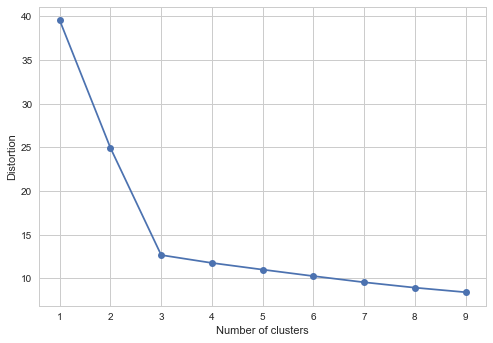

In [37]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

#### Based on the elbow plot, the maximum number of clusters should be 3.

### 4. Silhouette plot to check number of clusters

For n_clusters = 2 The average silhouette_score is : 0.542435069970526


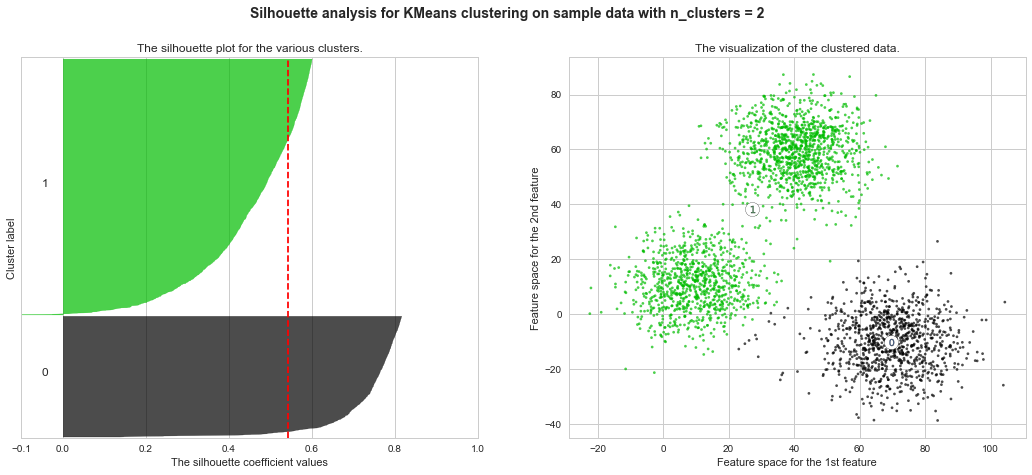

For n_clusters = 3 The average silhouette_score is : 0.6945587736089913


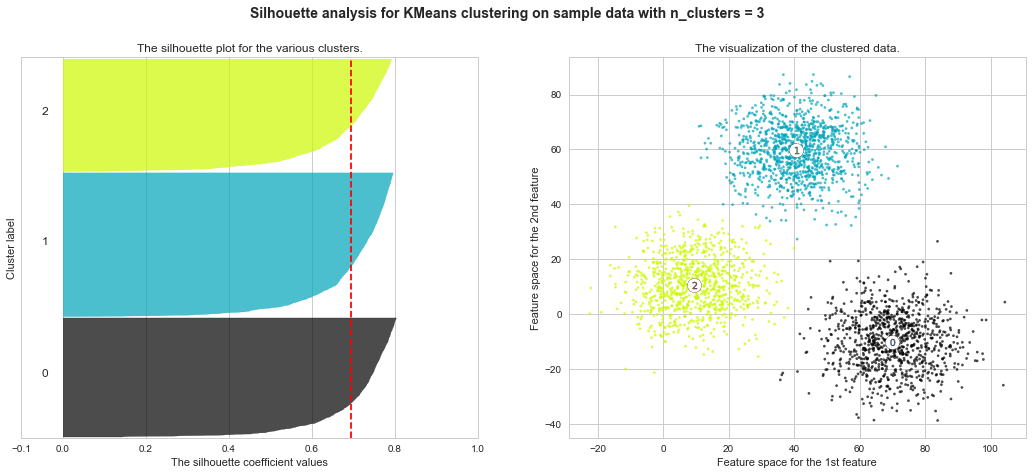

For n_clusters = 4 The average silhouette_score is : 0.5396884255599019


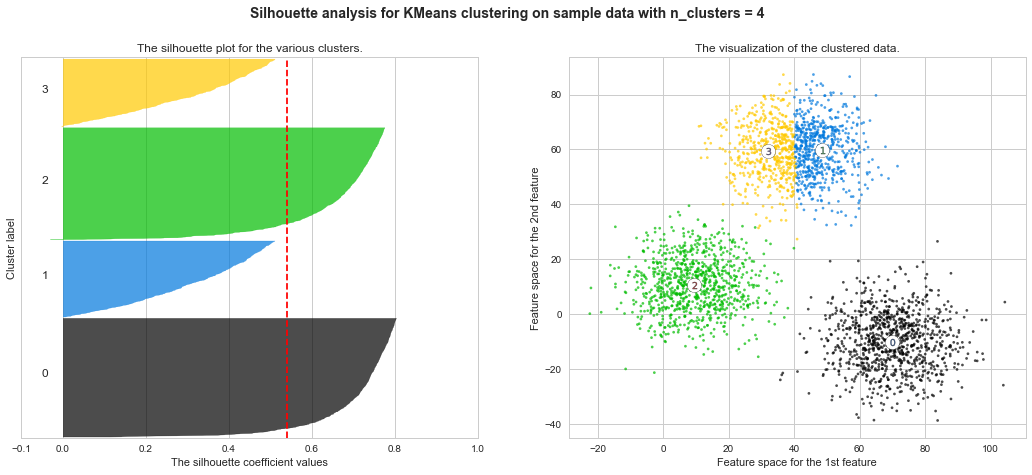

For n_clusters = 5 The average silhouette_score is : 0.40724434743667093


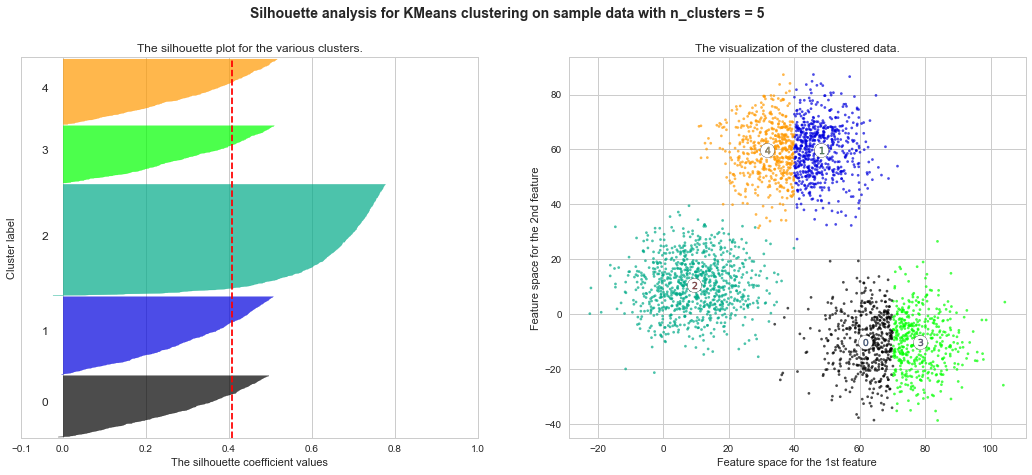

For n_clusters = 6 The average silhouette_score is : 0.3103217250262296


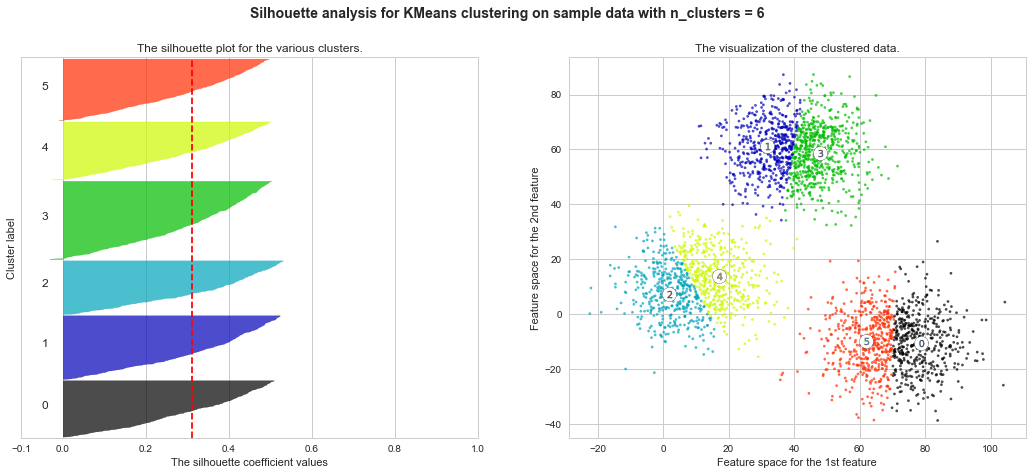

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### Based on the Silhouette plots, the maximum number of clusters should be 3.